# Questão 2 - Prova 2 de Inteligência Artificial

## Lucas Nóbrega e Nathália de Vasconcelos

Enunciado: utilizando a base disponível no ​ [link](https://archive.ics.uci.edu/ml/datasets/Avila), crie os datasets a seguir:

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


Elabore uma rede neural de duas camadas para classificação do banco de
dados.
Ao fim do treinamento, avalie o desempenho da rede utilizando a matriz de
confusão com o dataset de teste e mostre o valor de acurácia.
Observações:

● Utilize apenas o arquivo ​ avila-tr.txt​ .

● A camada de saída da rede deverá conter um neurônio para cada classe.

● Utilize o dataset de validação para criar algum critério de parada no
treinamento.

Bônus: defina uma arquitetura de rede neural ou modelos de ​ deep learning que
ultrapassem 75% de acurácia.

### DATA SET DESCRIPTION 
The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

### Class distribution (training set)
* A: 4286
* B: 5  
* C: 103 
* D: 352 
* E: 1095 
* F: 1961 
* G: 446 
* H: 519
* I: 831
* W: 44
* X: 522 
* Y: 266

### ATTRIBUTE DESCRIPTION
|ID|      Name    |
|-|-|
|F1|       intercolumnar distance |
|F2|       upper margin |
|F3|       lower margin |
|F4|       exploitation |
|F5|       row number |
|F6|      modular ratio |
|F7|       interlinear spacing |
|F8|       weight |
|F9|       peak number |
|F10|     modular ratio/ interlinear spacing|
Class: A, B, C, D, E, F, G, H, I, W, X, Y


CITATIONS
If you want to refer to the Avila data set in a publication, please cite the following paper:

C. De Stefano, M. Maniaci, F. Fontanella, A. Scotto di Freca,
Reliable writer identification in medieval manuscripts through page layout features: The "Avila" Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110.


In [1]:
import tensorflow as tf

/home/nath/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./avila/avila-tr.txt', header = None)

In [5]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [6]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


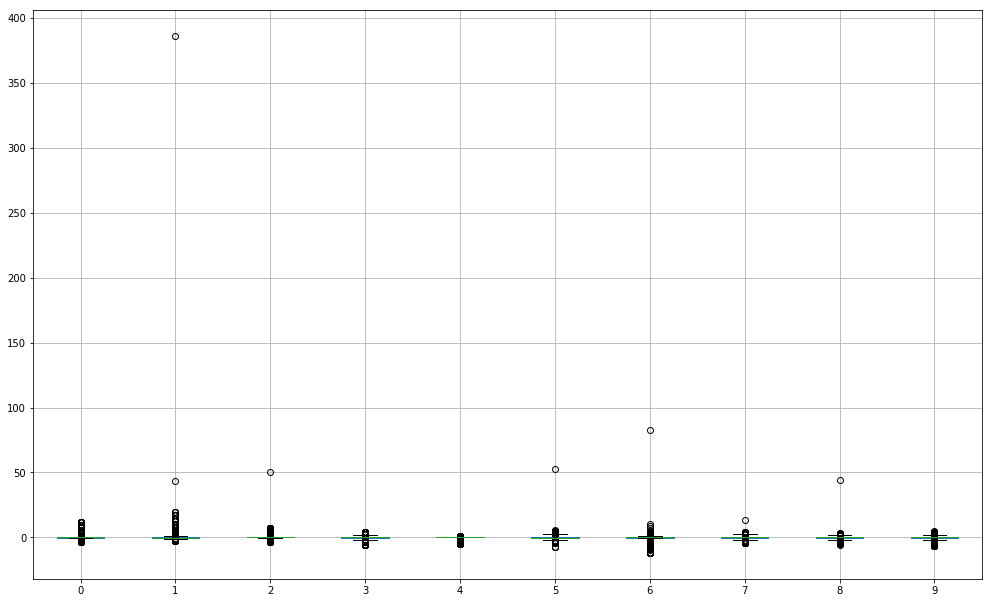

In [7]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

dataset.boxplot()

# Percebendo o _outlier_ na coluna 1

In [8]:
a = dataset.loc[dataset[1] == 386]

In [9]:
a

,0,1,2,3,4,5,6,7,8,9,10
6619,0.0,386.0,50.0,0.168104,0.0,53.0,83.0,0.275032,44.0,0.63802,A


In [10]:
aux = np.array(dataset[1])
dataset[1] = dataset[1].replace(386, np.nanmedian(aux))

In [25]:
dataset.loc[dataset[1] == 386]

,0,1,2,3,4,5,6,7,8,9,10


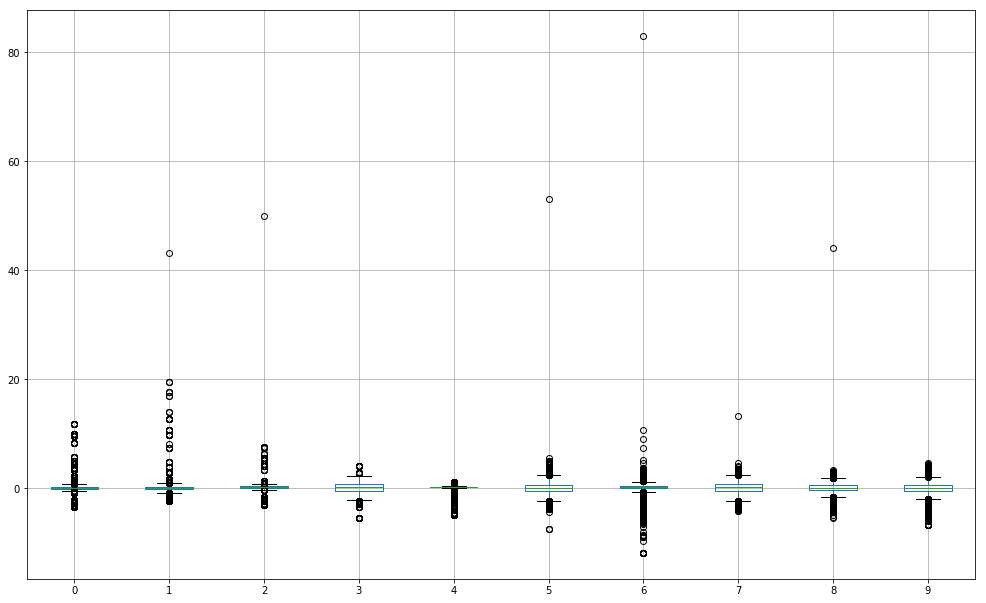

In [12]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [13]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.003403,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,1.042894,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,43.133656,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [14]:
b = np.array(dataset[6])

In [15]:
b


array([ 0.371178,  1.46594 , -0.081827, ...,  0.295677,  0.069175,
        0.786433])

In [16]:
np.max(b)

83.0

In [17]:
for i in [1, 2, 5, 6, 7, 8]:
    aux = np.array(dataset[i])
    dataset[i] = dataset[i].replace(np.max(aux), np.nanmedian(aux))

In [18]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.007544,-0.005298,-0.002387,0.006370,0.008886,-0.002331,0.009070,0.008702,0.000818
std,0.991431,0.953512,1.007528,1.008527,0.992053,0.999600,1.032191,0.995195,0.998735,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111778,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654886,0.500624,0.530855
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


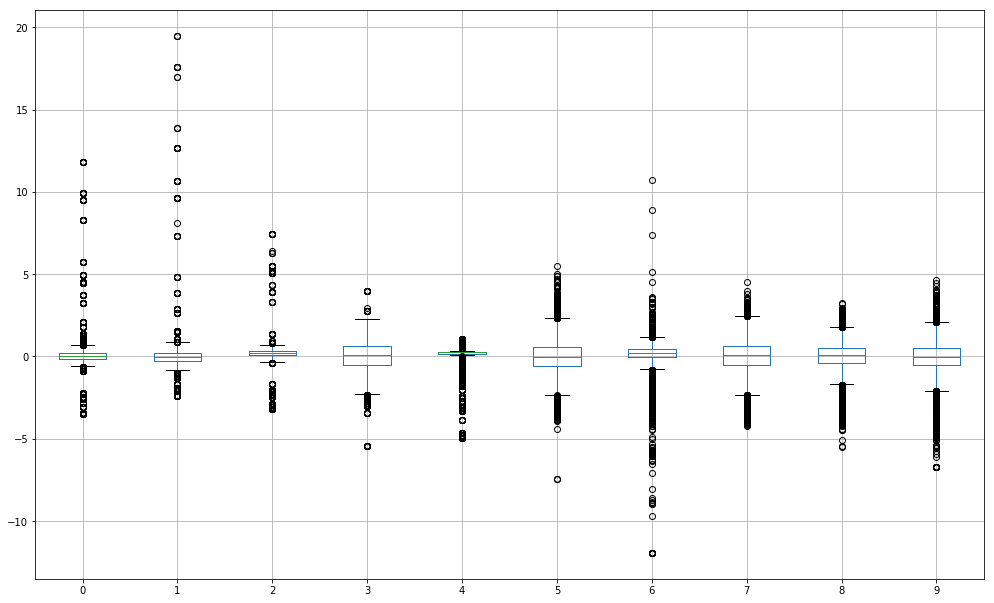

In [19]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

# Mudando a classe de caractere para inteiro

In [20]:
classes_number = [i for i in range(12)]
classes_charcteres = ["A","B","C","D","E","F","G","H","I","W","X","Y"]
dictionary_classes = dict(zip(classes_charcteres, classes_number))
dictionary_classes

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'W': 9,
 'X': 10,
 'Y': 11}

In [21]:
dataset[10].head(5)

0    A
1    A
2    A
3    A
4    F
Name: 10, dtype: object

In [22]:
for key in dictionary_classes:
    print(key, dictionary_classes[key])
    dataset[10] = dataset[10].replace(key, dictionary_classes[key])

A 0
B 1
C 2
D 3
E 4
F 5
G 6
H 7
I 8
W 9
X 10
Y 11


Testando se realmente funcionou

In [23]:
dataset[10].head()

0    0
1    0
2    0
3    0
4    5
Name: 10, dtype: int64

In [24]:
dataset[10].tail()

10425     5
10426     5
10427     0
10428     4
10429    10
Name: 10, dtype: int64

# Análise inicial de correlação entre os atributos

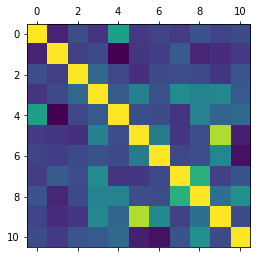

In [25]:
plt.matshow(dataset.corr())

Percebemos que os atributos 5('row number') e 9(peak number) possuem alta correlação

In [26]:
dataset[9].corr(dataset[5])

0.8485534155934017

?dataset.plot('hist')


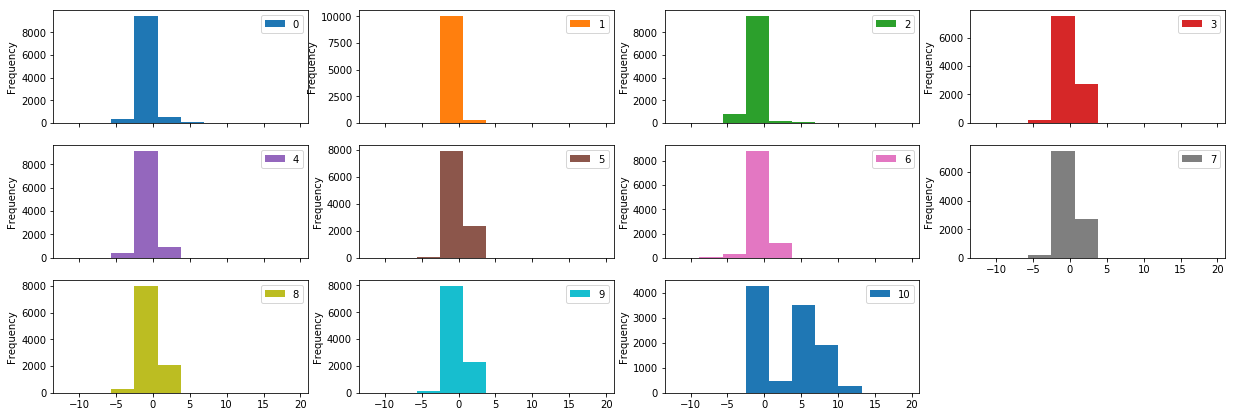

In [27]:
a = dataset.plot(kind='hist', subplots=True, figsize=(21,12), layout=(5,4))

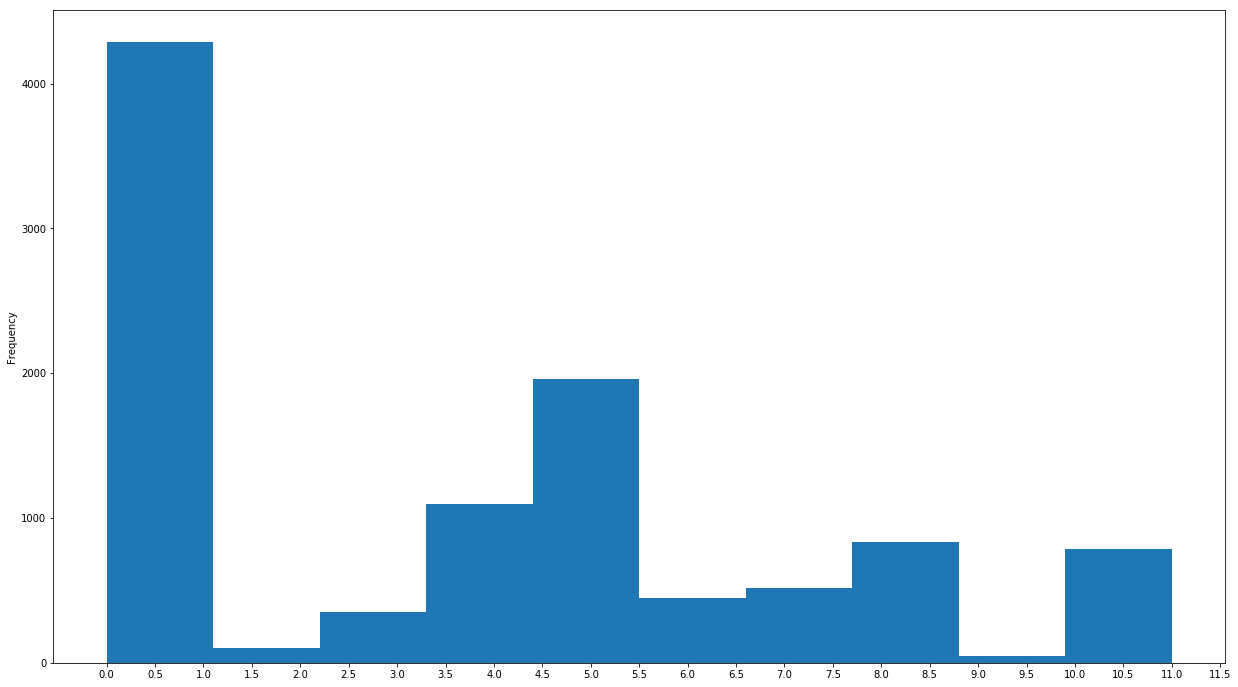

In [28]:
dataset[10].plot(kind='hist',figsize=(21,12), xticks=[i/2 for i in range(24)])

# Normalizar os atributos

In [29]:
dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [30]:
from sklearn import preprocessing

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)

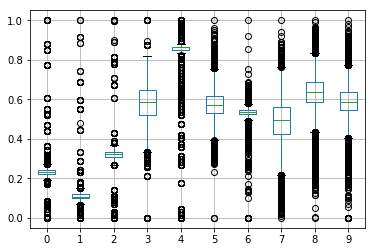

In [31]:
df.boxplot()

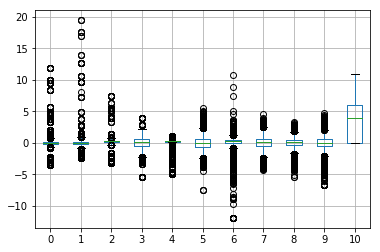

In [32]:
dataset.boxplot()

In [33]:
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5
5,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,0
6,0.389513,-0.220579,-3.210528,-2.624155,0.261718,-0.764757,0.484429,-0.597510,-0.372457,-0.810261,0
7,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,-0.842014,5
8,0.500607,0.140576,0.388552,-0.637358,0.261718,-0.681707,0.295677,0.931046,0.500624,-0.642297,7
9,-0.252367,0.069915,0.246296,0.523550,0.261718,-1.221530,0.899684,1.373076,0.625350,-1.400890,4


# Diminuir a classe A do sistema

Devido a um desbalanceamento das classes é necessário remover algumas instancias de A

In [34]:
from sklearn.utils import resample

In [35]:
dataset_b = dataset[dataset[10] == 1]

# Criando fake data para a classe B

In [36]:
dataset[10].describe()

count    10430.000000
mean         3.542761
std          3.418046
min          0.000000
25%          0.000000
50%          4.000000
75%          6.000000
max         11.000000
Name: 10, dtype: float64

In [37]:
# Docstring:
# Return random integer in range [a, b], including both end points.
df = dataset
# array com indices de B
a = dataset.loc[dataset[10] == 1].index
a

Int64Index([708, 4639, 7119, 7740, 9457], dtype='int64')

In [44]:
import random
import datetime
from datetime import datetime as datetime

for i in range(10):
    random.seed(datetime.now())
    parametro_alterado = random.randint(0,9)
    linha_alterada = random.randint(0,len(a)-1)
    valor_a_ser_alterado = (random.random())/10
    soma_ou_diminui = random.randint(0,1)
    
    print(parametro_alterado, linha_alterada, valor_a_ser_alterado, soma_ou_diminui)
    print(df[parametro_alterado][a[linha_alterada]])
    print(valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]])
    print(df[linha_alterada-1:linha_alterada])
    print(12*"#")
    
    
    
    if soma_ou_diminui == 1:
        pass
        #soma
        #df.append(pd.DataFrame(valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]]))
    
    #else:
    #    df = df.append(-valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]])
    
    #a = df.loc[dataset[10] == 1].index

0 4 0.09190188811913438 1
-0.128929
-0.037027111880865604
         0       1         2        3         4         5         6   \
3  0.031541  0.2976 -3.210528 -0.58359 -0.721442 -0.307984  0.710932   

         7         8         9   10  
3  1.051693  0.594169 -0.533994   0  
############
4 4 0.03995625978983738 1
-3.22403
-3.1840737402101627
         0       1         2        3         4         5         6   \
3  0.031541  0.2976 -3.210528 -0.58359 -0.721442 -0.307984  0.710932   

         7         8         9   10  
3  1.051693  0.594169 -0.533994   0  
############
8 2 0.023568265700846015 0
1.404887
1.428455265700846
         0         1         2         3         4        5        6   \
1  0.130292  0.870736 -3.210528  0.062493  0.261718  1.43606  1.46594   

         7         8         9   10  
1  0.636203  0.282354  0.515587   0  
############
7 0 0.08392281545422367 1
0.80704
0.8909628154542236
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Index: []
######

# Usando Keras

Keras é uma API de alto nível para o tensorflow, que permite criar redes neurais complexas sem precisar entender as variáveis que o Tensorflow possui

Primeiro é preciso particionar a base de acordo com as porcentagens abaixo

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values

In [46]:
import math

Pega os valores do começo até o numero correspondente a 60% menos 1 (função floor)

In [47]:
x_treinamento = X[:math.floor(len(X)*0.6)]
y_treinamento = y[:math.floor(len(y)*0.6)]

Pega os valores do número correspondente a 60% mais 1 (função ceil) até 60% mais 1 (função ceil) mais 20% menos 1 (função floor)

In [48]:
x_validacao = X[math.ceil(len(X)*0.6):(math.ceil(len(X)*0.6)+math.floor(len(X)*0.2))]
y_validacao = y[math.ceil(len(y)*0.6):(math.ceil(len(y)*0.6)+math.floor(len(y)*0.2))]

Pega os valores do número correspondente a 60% mais 1 (função ceil) mais 20% mais 1 (função ceil) mais 20% menos 1 função floor

In [49]:
x_teste = X[(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)):(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)+math.ceil(len(X)*0.2))]
y_teste = y[(math.ceil(len(y)*0.6)+math.ceil(len(y)*0.2)):(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)+math.ceil(len(X)*0.2))]

Pega os valores do número correspondente a 60% mais 1 (função ceil) até 60% mais 1 (função ceil) mais 20% mais 1 (função floor)

In [50]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.GradientDescentOptimizer(0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''

model.fit(x_treinamento, y_treinamento, epochs=20)

print("Evaluate:")
print("Returns the loss value & metrics values for the model in test mode.")
print(model.evaluate(x_teste, y_teste))

print("Returns the loss value & metrics values for the model in test mode. Test using validation")
print(model.evaluate(x_validacao, y_validacao))

Epoch 1/20
6258/6258 [==============================] - 0s 56us/step - loss: 1.7228 - acc: 0.4578
Epoch 2/20
6258/6258 [==============================] - 0s 21us/step - loss: 1.3822 - acc: 0.5297
Epoch 3/20
6258/6258 [==============================] - 0s 20us/step - loss: 1.2863 - acc: 0.5641
Epoch 4/20
6258/6258 [==============================] - 0s 20us/step - loss: 1.2286 - acc: 0.5844
Epoch 5/20
6258/6258 [==============================] - 0s 21us/step - loss: 1.1793 - acc: 0.6056
Epoch 6/20
6258/6258 [==============================] - 0s 20us/step - loss: 1.1390 - acc: 0.6179
Epoch 7/20
6258/6258 [==============================] - 0s 20us/step - loss: 1.1062 - acc: 0.6261
Epoch 8/20
6258/6258 [==============================] - 0s 20us/step - loss: 1.0802 - acc: 0.6318
Epoch 9/20
6258/6258 [==============================] - 0s 19us/step - loss: 1.0571 - acc: 0.6384
Epoch 10/20
6258/6258 [==============================] - 0s 21us/step - loss: 1.0388 - acc: 0.6406
Epoch 11/20
6258/62

Errado, pois a separação está diferente da tabela acima, foi usada uma nova porcentagem para testes

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Teste| 40%|


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6)

In [52]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate:")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)

Epoch 1/20
6258/6258 [==============================] - 1s 106us/step - loss: 1.6251 - acc: 0.4765
Epoch 2/20
6258/6258 [==============================] - 0s 38us/step - loss: 1.2016 - acc: 0.5719
Epoch 3/20
6258/6258 [==============================] - 0s 39us/step - loss: 1.0530 - acc: 0.6254
Epoch 4/20
6258/6258 [==============================] - 0s 38us/step - loss: 0.9627 - acc: 0.6548
Epoch 5/20
6258/6258 [==============================] - 0s 39us/step - loss: 0.8949 - acc: 0.6729
Epoch 6/20
6258/6258 [==============================] - 0s 38us/step - loss: 0.8473 - acc: 0.6833
Epoch 7/20
6258/6258 [==============================] - 0s 39us/step - loss: 0.8087 - acc: 0.6972
Epoch 8/20
6258/6258 [==============================] - 0s 38us/step - loss: 0.7795 - acc: 0.7133
Epoch 9/20
6258/6258 [==============================] - 0s 40us/step - loss: 0.7458 - acc: 0.7202
Epoch 10/20
6258/6258 [==============================] - 0s 40us/step - loss: 0.7226 - acc: 0.7263
Epoch 11/20
6258/6

[0.631493254338792, 0.7615052731930924]

In [53]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)

Epoch 1/20
6258/6258 [==============================] - 0s 76us/step - loss: 1.5845 - acc: 0.4848
Epoch 2/20
6258/6258 [==============================] - 0s 31us/step - loss: 1.2148 - acc: 0.5722
Epoch 3/20
6258/6258 [==============================] - 0s 31us/step - loss: 1.1045 - acc: 0.6026
Epoch 4/20
6258/6258 [==============================] - 0s 32us/step - loss: 1.0166 - acc: 0.6331
Epoch 5/20
6258/6258 [==============================] - 0s 30us/step - loss: 0.9732 - acc: 0.6465
Epoch 6/20
6258/6258 [==============================] - 0s 30us/step - loss: 0.9185 - acc: 0.6657
Epoch 7/20
6258/6258 [==============================] - 0s 31us/step - loss: 0.8870 - acc: 0.6721
Epoch 8/20
6258/6258 [==============================] - 0s 29us/step - loss: 0.8614 - acc: 0.6831
Epoch 9/20
6258/6258 [==============================] - 0s 30us/step - loss: 0.8309 - acc: 0.6956
Epoch 10/20
6258/6258 [==============================] - 0s 30us/step - loss: 0.8052 - acc: 0.6985
Epoch 11/20
6258/62

[0.7204558540739241, 0.72315436235896]